<a href="https://colab.research.google.com/github/AfsanehHabibi/reddit-conversation-quality/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 766.7 kB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = "/content/drive/MyDrive/University/RedditData/"

In [4]:
import pickle

with open(f"{base_path}conversations_with_sites.pkl", 'rb') as file:
    conversations = pickle.load(file)

print("Len loaded data:", len(conversations))

Len loaded data: 18184


site_ref_count, has_reasoning, readability_score, politnes_score

1.   List item
2.   List item



In [12]:

for id in conversations:
    comments = conversations[id]['comments']
    for comment in comments:
        if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]'):
          print(comment['site_ref_count'])

Streaming output truncated to the last 5000 lines.
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.008928571428571428
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.008928571428571428
0.008928571428571428
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.008928571428571428
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.008928571428571428
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


KeyboardInterrupt: 

In [7]:
# Import necessary library
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Collect data for normalization
data_to_normalize = []

for id in conversations:
    comments = conversations[id]['comments']
    for comment in comments:
        if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]'):
            # Extracting the numeric variables
            site_ref_count = comment['site_ref_count']
            has_reasoning = comment['has_reasoning']
            readability_score = comment['readability_score']
            politness_score = comment['politness_score']

            # Append data to the list for normalization
            data_to_normalize.append([site_ref_count, has_reasoning, readability_score, politness_score])

# Perform normalization
normalized_data = scaler.fit_transform(data_to_normalize)

# Assign normalized values back to each comment
index = 0
for id in conversations:
    comments = conversations[id]['comments']
    for comment in comments:
        if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]'):
            comment['site_ref_count'] = normalized_data[index][0]
            comment['has_reasoning'] = normalized_data[index][1]
            comment['readability_score'] = normalized_data[index][2]
            comment['politness_score'] = normalized_data[index][3]
            index += 1


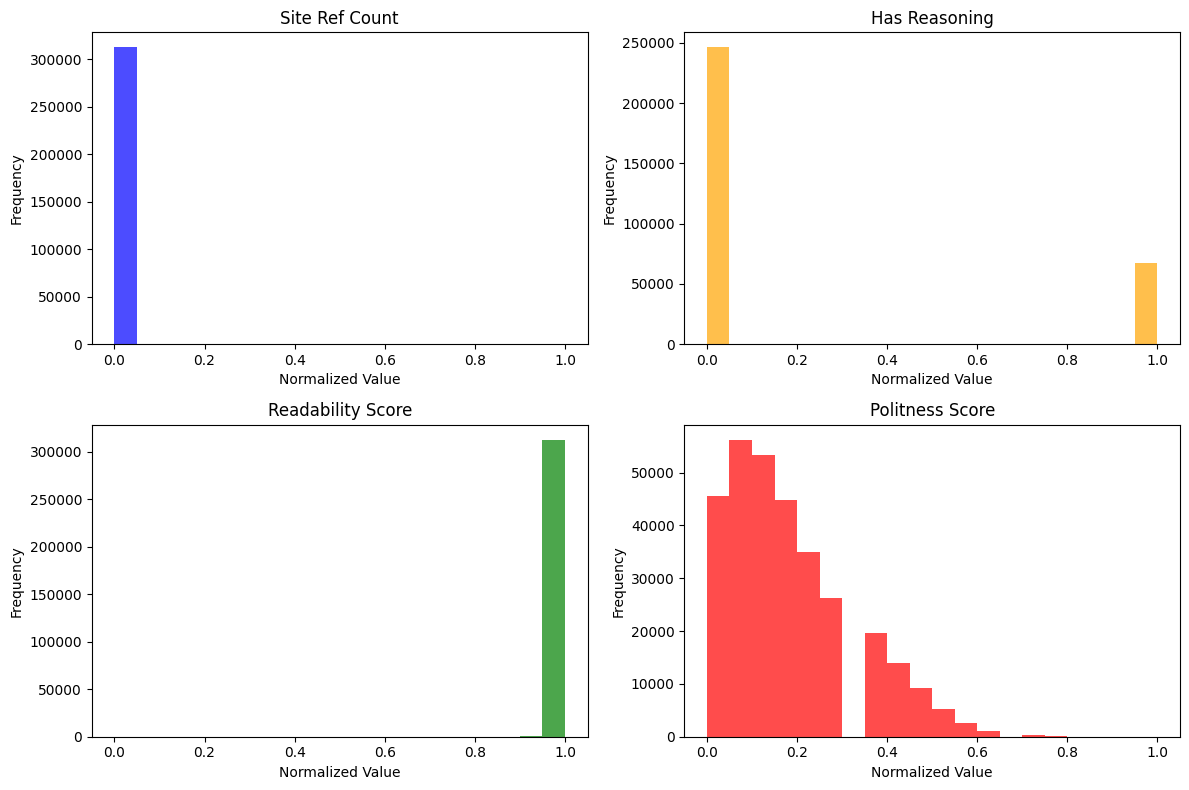

In [8]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each variable
axs[0, 0].hist(normalized_data[:, 0], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Site Ref Count')
axs[0, 0].set_xlabel('Normalized Value')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(normalized_data[:, 1], bins=20, color='orange', alpha=0.7)
axs[0, 1].set_title('Has Reasoning')
axs[0, 1].set_xlabel('Normalized Value')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(normalized_data[:, 2], bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Readability Score')
axs[1, 0].set_xlabel('Normalized Value')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(normalized_data[:, 3], bins=20, color='red', alpha=0.7)
axs[1, 1].set_title('Politness Score')
axs[1, 1].set_xlabel('Normalized Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


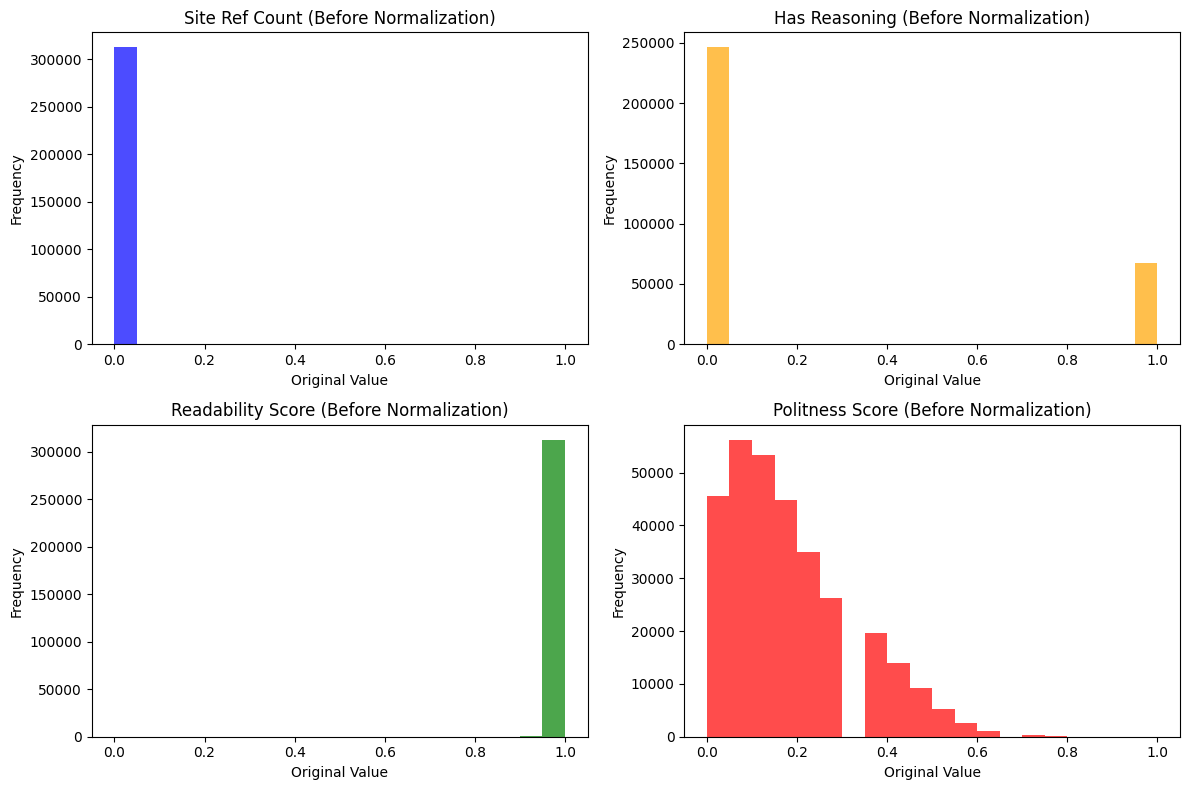

In [9]:
import matplotlib.pyplot as plt

# Original data (before normalization)
original_site_ref_count = [comment['site_ref_count'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_has_reasoning = [comment['has_reasoning'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_readability_score = [comment['readability_score'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_politness_score = [comment['politness_score'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]

# Create a figure with subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each variable (before normalization)
axs[0, 0].hist(original_site_ref_count, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Site Ref Count (Before Normalization)')
axs[0, 0].set_xlabel('Original Value')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(original_has_reasoning, bins=20, color='orange', alpha=0.7)
axs[0, 1].set_title('Has Reasoning (Before Normalization)')
axs[0, 1].set_xlabel('Original Value')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(original_readability_score, bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Readability Score (Before Normalization)')
axs[1, 0].set_xlabel('Original Value')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(original_politness_score, bins=20, color='red', alpha=0.7)
axs[1, 1].set_title('Politness Score (Before Normalization)')
axs[1, 1].set_xlabel('Original Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [11]:
original_site_ref_count

[0.0,
 0.0,
 0.0,
 0.0,
 0.008928571428571428,
 0.008928571428571428,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008928571428571428,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

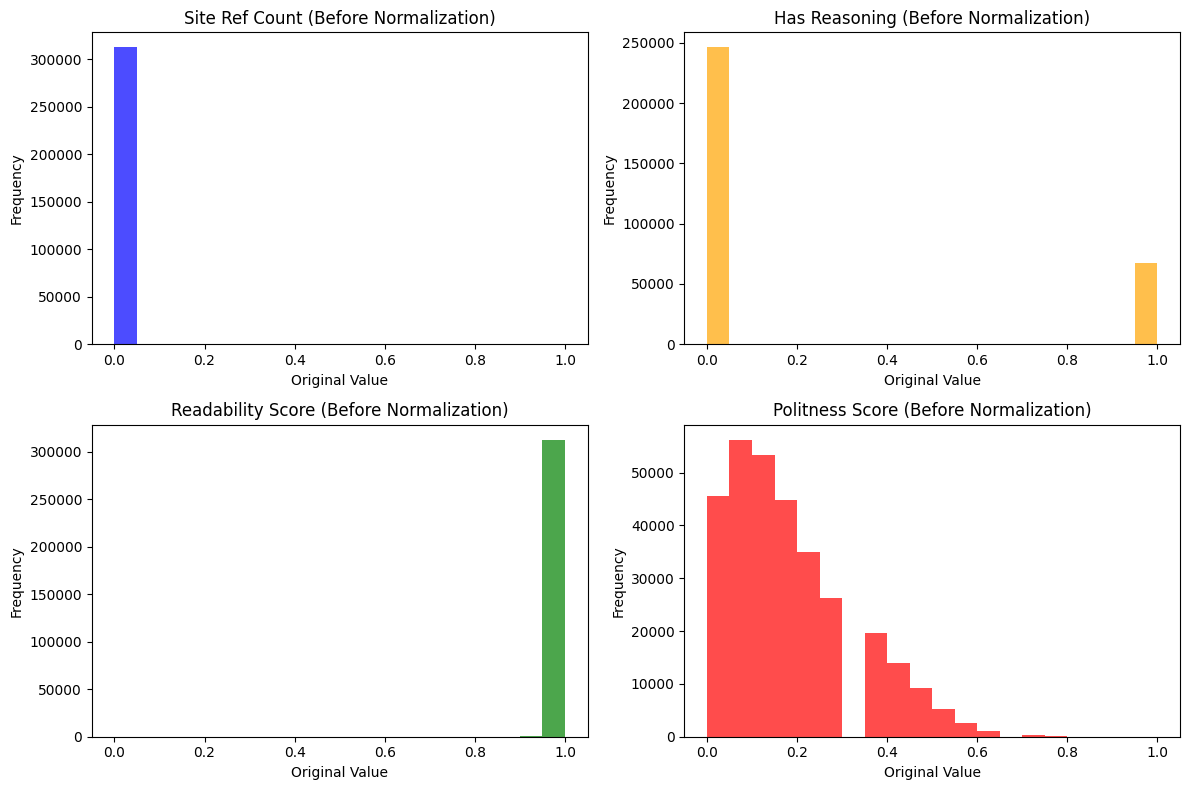

In [10]:
import matplotlib.pyplot as plt

# Original data (before normalization)
original_site_ref_count = [comment['site_ref_count'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_has_reasoning = [comment['has_reasoning'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_readability_score = [comment['readability_score'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]
original_politness_score = [comment['politness_score'] for id in conversations for comment in conversations[id]['comments'] if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]')]

# Create a figure with subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each variable (before normalization)
axs[0, 0].hist(original_site_ref_count, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Site Ref Count (Before Normalization)')
axs[0, 0].set_xlabel('Original Value')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(original_has_reasoning, bins=20, color='orange', alpha=0.7)
axs[0, 1].set_title('Has Reasoning (Before Normalization)')
axs[0, 1].set_xlabel('Original Value')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(original_readability_score, bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Readability Score (Before Normalization)')
axs[1, 0].set_xlabel('Original Value')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(original_politness_score, bins=20, color='red', alpha=0.7)
axs[1, 1].set_title('Politness Score (Before Normalization)')
axs[1, 1].set_xlabel('Original Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
